In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
np.unique(df.output,return_counts=True)

(array([0, 1], dtype=int64), array([138, 165], dtype=int64))

In [6]:
print(f'Shape of the data frame {df.shape}')

Shape of the data frame (303, 14)


In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
df.nunique(axis=0)

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [10]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

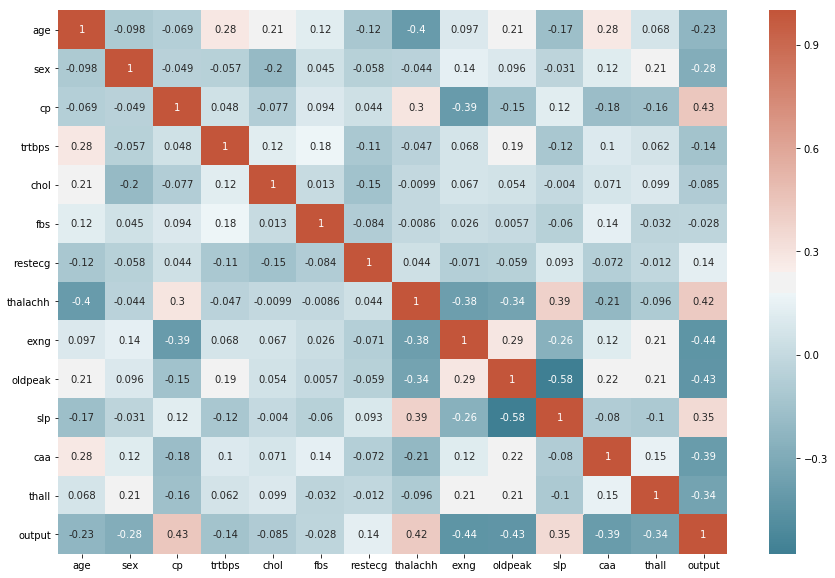

In [13]:
plt.figure(figsize=(15,10))
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

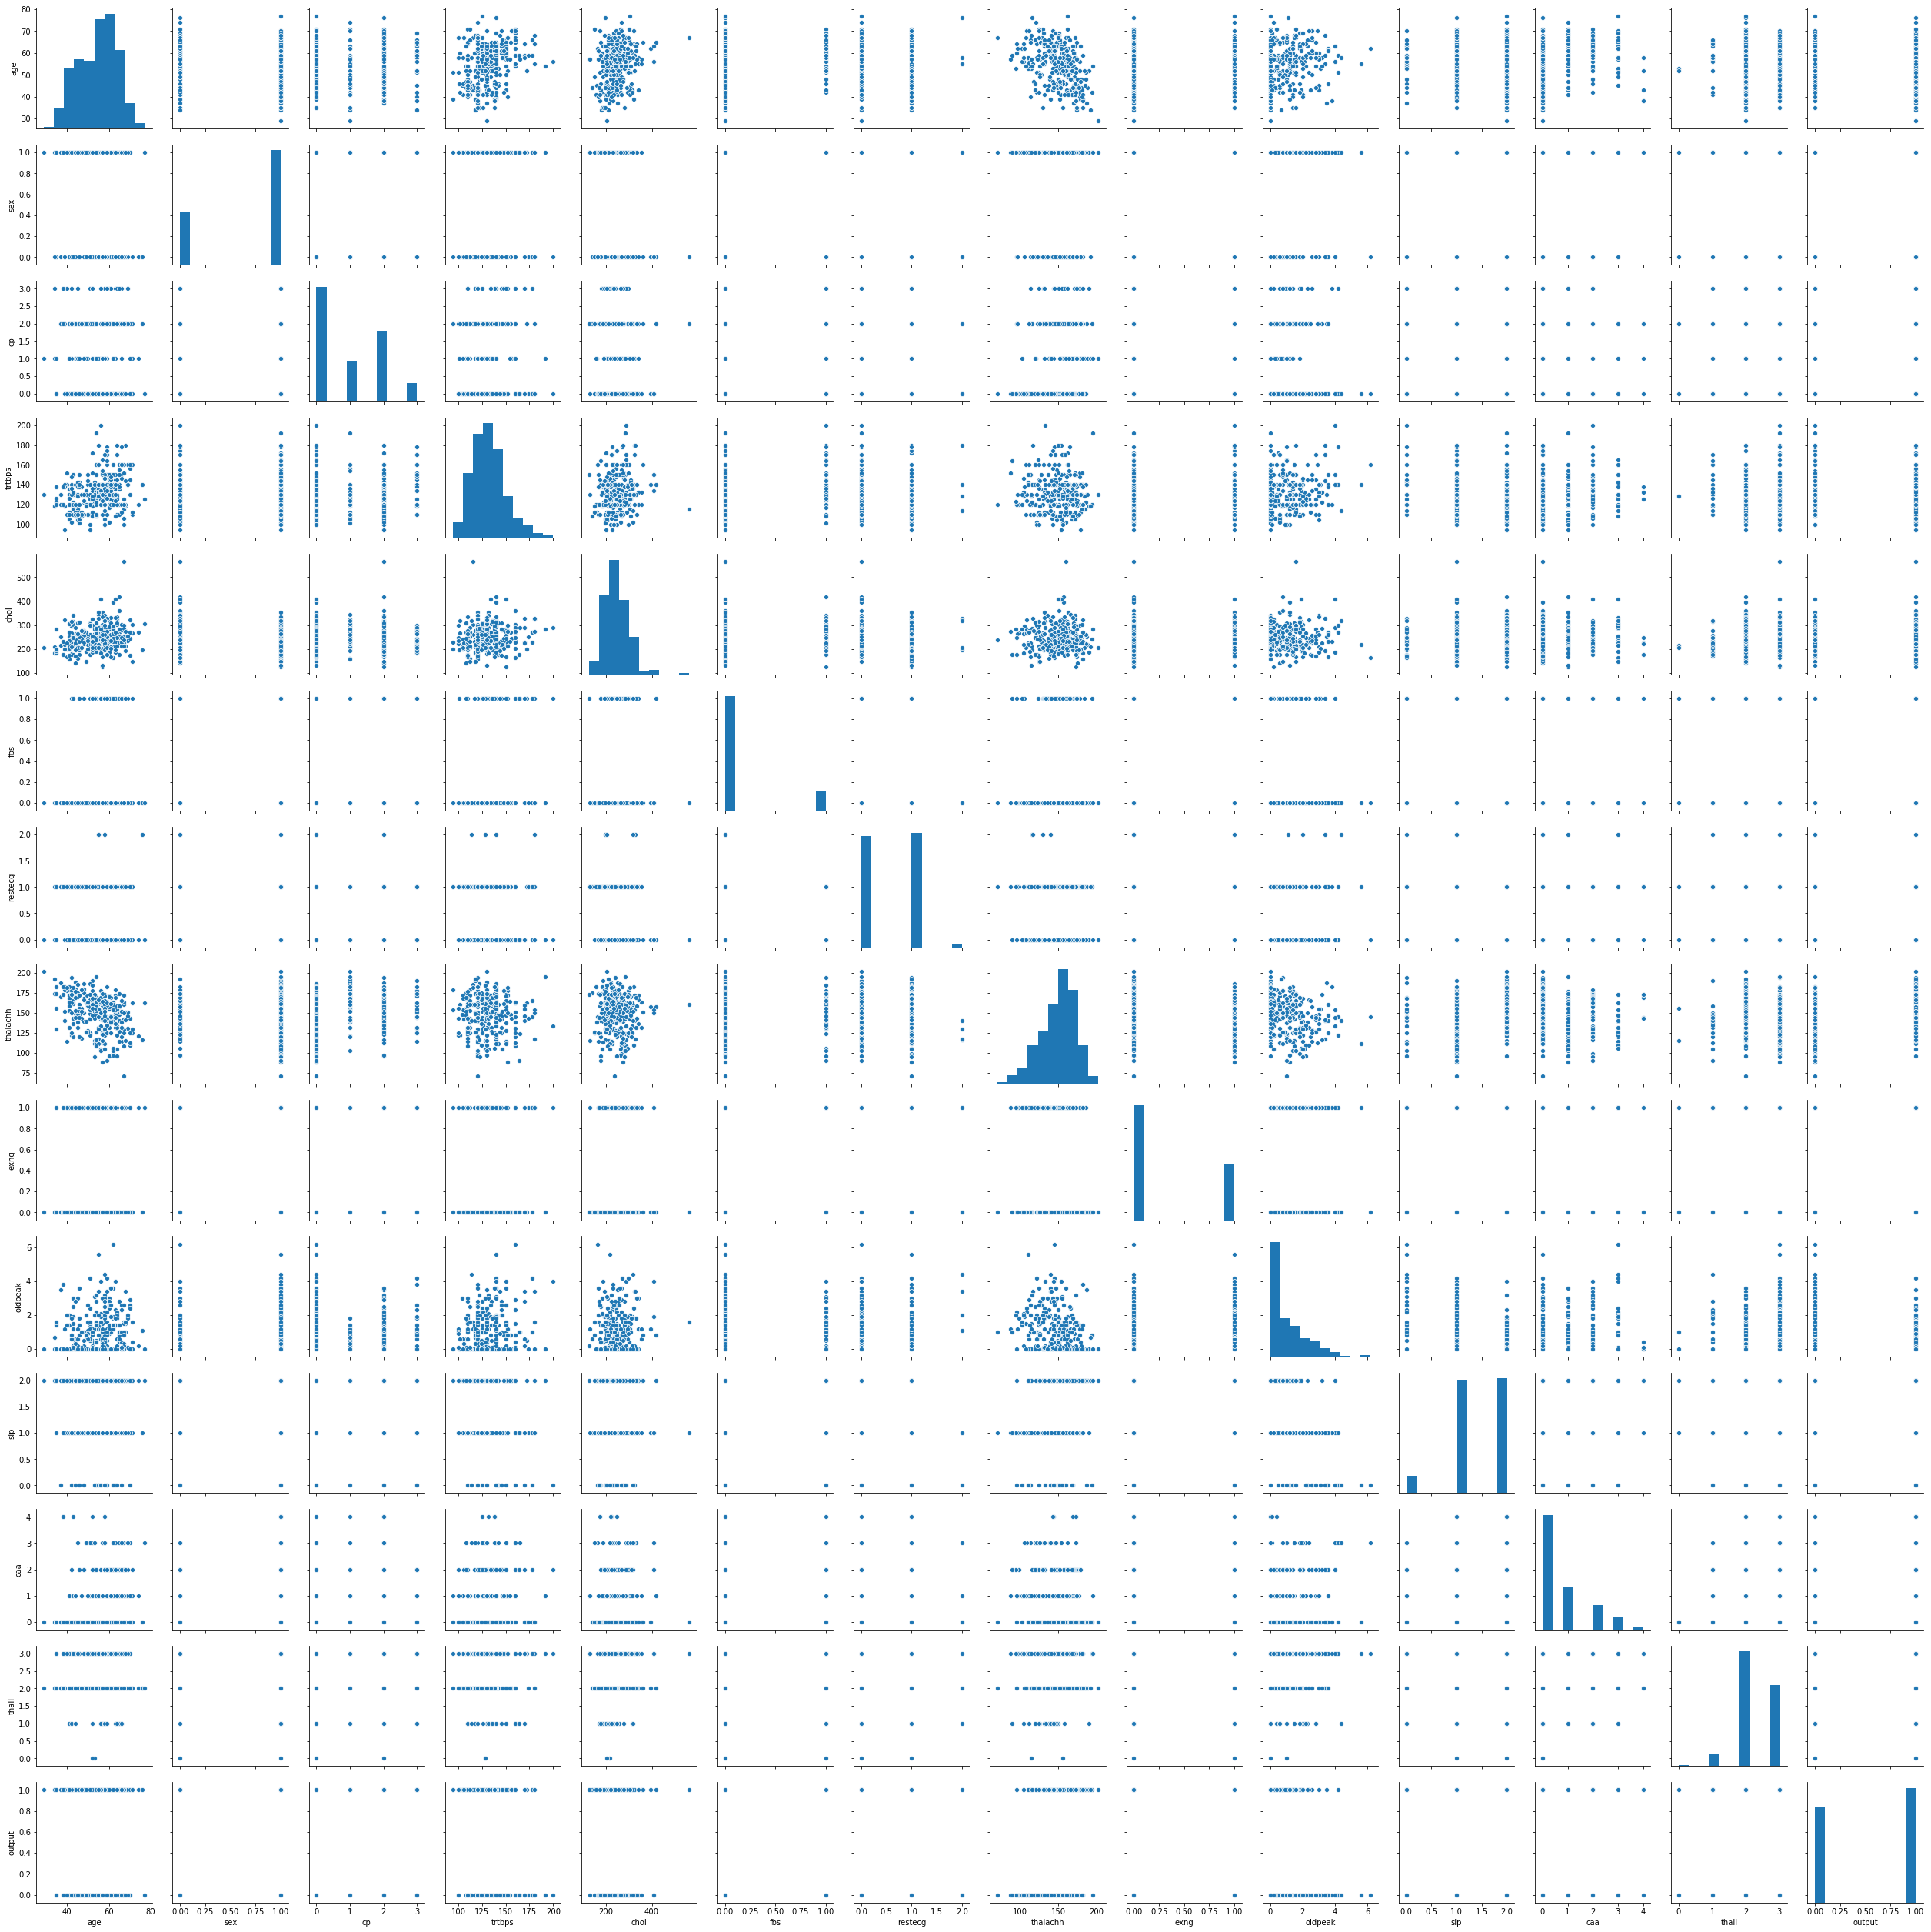

In [14]:
sns.pairplot(df)

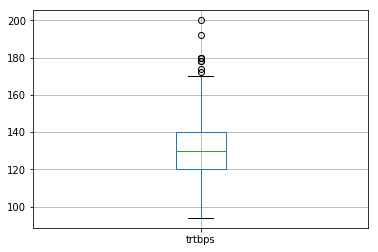

In [15]:
df.boxplot('trtbps')

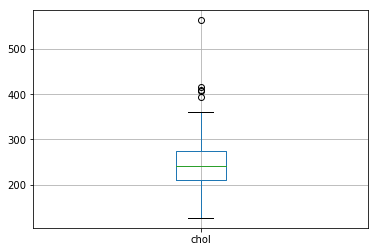

In [16]:
df.boxplot('chol')

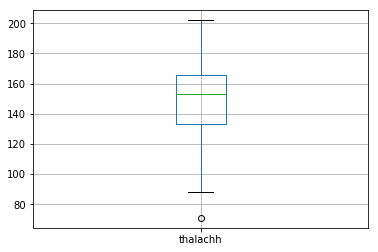

In [17]:
df.boxplot('thalachh')

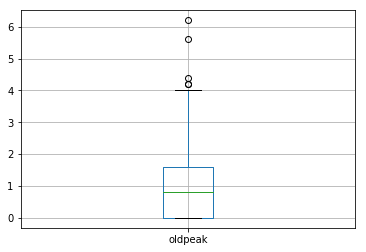

In [18]:
df.boxplot('oldpeak')

In [19]:
# from scipy import stats
# z_scores = stats.zscore(df)

# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# new_df = df[filtered_entries]

# new_df.head()

In [20]:
new_df = df

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df[['age']] = scaler.fit_transform(new_df[['age']])

In [22]:
new_df[['trtbps']] = scaler.fit_transform(new_df[['trtbps']])

In [23]:
new_df[['chol']] = scaler.fit_transform(new_df[['chol']])

In [24]:
new_df[['thalachh']] = scaler.fit_transform(new_df[['thalachh']])

In [25]:
new_df[['oldpeak']] = scaler.fit_transform(new_df[['oldpeak']])

In [26]:
new_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [27]:
new_df = pd.concat([new_df,pd.get_dummies(new_df['cp'])],axis=1)

In [28]:
new_df = pd.concat([new_df,pd.get_dummies(new_df['restecg'])],axis=1)

In [29]:
new_df = pd.concat([new_df,pd.get_dummies(new_df['slp'])],axis=1)

In [30]:
new_df = pd.concat([new_df,pd.get_dummies(new_df['caa'])],axis=1)

In [31]:
new_df = new_df.drop(columns=['cp','restecg','slp','caa'])

In [32]:
new_df.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,thall,output,...,1,2,0,1,2,0,1,2,3,4
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,1,1,...,0,0,1,0,0,1,0,0,0,0
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,2,1,...,1,0,1,0,0,1,0,0,0,0
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,2,1,...,0,0,0,0,1,1,0,0,0,0
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,2,1,...,1,0,0,0,1,1,0,0,0,0
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,2,1,...,1,0,0,0,1,1,0,0,0,0


In [33]:
X = new_df.loc[:, new_df.columns != 'output']
y = new_df['output']

In [34]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int64), array([138, 165], dtype=int64))

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,test_size = 0.2)

In [36]:
len(X.columns)

24

In [37]:
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)

In [38]:
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [39]:
y_train.dtype

torch.int64

In [40]:
X_train.shape

torch.Size([242, 24])

In [41]:
X.columns

Index([     'age',      'sex',   'trtbps',     'chol',      'fbs', 'thalachh',
           'exng',  'oldpeak',    'thall',          0,          1,          2,
                3,          0,          1,          2,          0,          1,
                2,          0,          1,          2,          3,          4],
      dtype='object')

## Model initialization

In [42]:
class MLP(nn.Module):
    def __init__(self, in_sz=24, out_sz=2, layers=[15,10,5]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],layers[2])
        self.fc4 = nn.Linear(layers[2],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)
        return F.log_softmax(X,dim=1)

In [43]:
torch.manual_seed(101)
model = MLP()

In [44]:
model

MLP(
  (fc1): Linear(in_features=24, out_features=15, bias=True)
  (fc2): Linear(in_features=15, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=5, bias=True)
  (fc4): Linear(in_features=5, out_features=2, bias=True)
)

In [45]:
for param in model.parameters():
    print(param.numel())

360
15
150
10
50
5
10
2


In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## Model training

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [48]:
torch.autograd.set_detect_anomaly(True)

In [49]:
epochs = 300
losses = []
test_loss = []
for i in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train.squeeze_(-1))
    
    
    cr =  nn.CrossEntropyLoss()
    y_t_pr = model(X_test)
    test_l = cr(y_t_pr,y_test.squeeze_(-1))
    test_loss.append(test_l)
    losses.append(loss)
    
    
    predicted = torch.max(y_pred,1)[1]
    
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if i%100 == 0:
        print(f'EPOCH: {i} LOSS:{loss}')

EPOCH: 0 LOSS:0.737801194190979
EPOCH: 100 LOSS:0.6163157820701599
EPOCH: 200 LOSS:0.48151981830596924


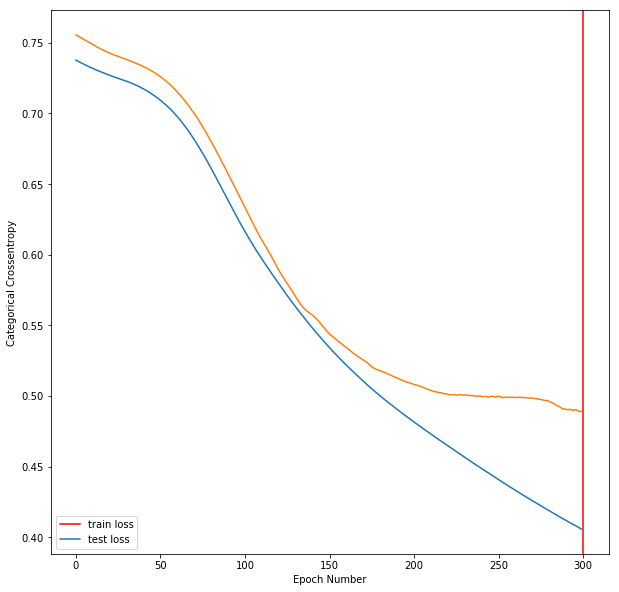

In [50]:
plt.figure(figsize=(10,10))
plt.xlabel('Epoch Number')
plt.ylabel('Categorical Crossentropy')
plt.axvline(300,label='early stopping point',c='red')
plt.plot(losses)
plt.plot(test_loss)
plt.legend(['train loss','test loss'])
plt.show()

In [53]:
with torch.no_grad():
    y_pred = model(X_test)
    loss = criterion(y_pred,y_test.squeeze_(-1))

In [54]:
loss

tensor(0.4891)

## Model evaluation

In [55]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data.view(1,-1))
        
        print(f"{i+1}.) {y_val} {y_test[i]}")
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1
    print(f"{correct} out of {len(X_test)} is correctly predicted. Accuracy: {correct/len(X_test)*100} %")

1.) tensor([[-0.8110, -0.5878]]) 1
2.) tensor([[-0.8110, -0.5878]]) 1
3.) tensor([[-0.0769, -2.6030]]) 0
4.) tensor([[-0.8110, -0.5878]]) 1
5.) tensor([[-0.8110, -0.5878]]) 1
6.) tensor([[-4.5156e-04, -7.7029e+00]]) 0
7.) tensor([[-0.8110, -0.5878]]) 0
8.) tensor([[-0.8110, -0.5878]]) 1
9.) tensor([[-0.8110, -0.5878]]) 1
10.) tensor([[-0.8110, -0.5878]]) 1
11.) tensor([[-0.8110, -0.5878]]) 1
12.) tensor([[-0.8110, -0.5878]]) 1
13.) tensor([[-0.8110, -0.5878]]) 1
14.) tensor([[-0.4876, -0.9522]]) 0
15.) tensor([[-0.0062, -5.0844]]) 0
16.) tensor([[-0.7023, -0.6840]]) 0
17.) tensor([[-0.8110, -0.5878]]) 1
18.) tensor([[-0.0180, -4.0248]]) 0
19.) tensor([[-0.0269, -3.6282]]) 0
20.) tensor([[-0.0252, -3.6946]]) 0
21.) tensor([[-0.8110, -0.5878]]) 1
22.) tensor([[-0.8110, -0.5878]]) 1
23.) tensor([[-0.8110, -0.5878]]) 1
24.) tensor([[-0.8110, -0.5878]]) 1
25.) tensor([[-0.8110, -0.5878]]) 0
26.) tensor([[-0.8110, -0.5878]]) 1
27.) tensor([[-0.8110, -0.5878]]) 1
28.) tensor([[-0.8110, -0.587

In [56]:
torch.save(model.state_dict(),'new_hbv.pt')

In [57]:
y_train

tensor([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 1])

In [58]:
set(y)

{0, 1}

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
y_eval = model.forward(X_test)

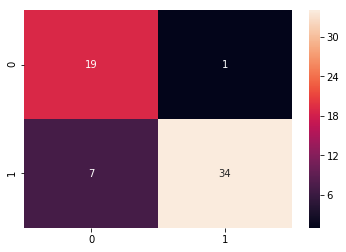

In [66]:
sns.heatmap(confusion_matrix(y_eval.argmax(1),y_test),annot=True)

In [67]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_eval.argmax(1),y_test))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83        20
           1       0.97      0.83      0.89        41

   micro avg       0.87      0.87      0.87        61
   macro avg       0.85      0.89      0.86        61
weighted avg       0.89      0.87      0.87        61

